In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd gdrive/My\ Drive/課程/02_深度學習與電腦視覺馬拉松/05_實際操作

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/課程/02_深度學習與電腦視覺馬拉松/05_實際操作


In [76]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
img_path = 'lena.png'

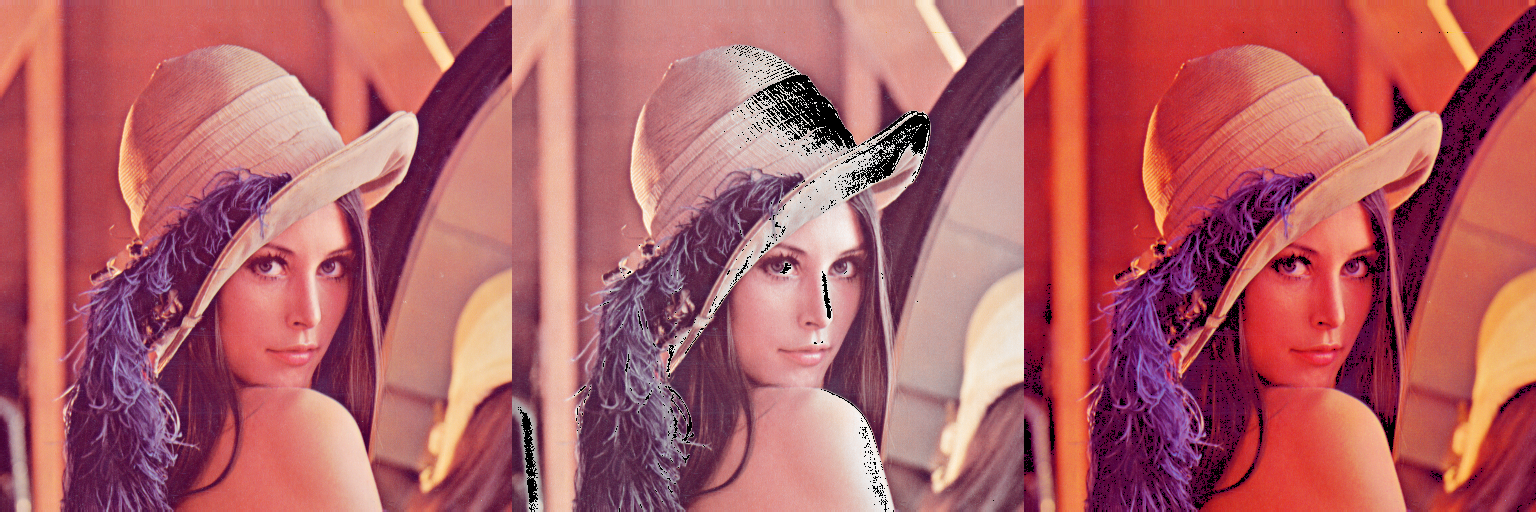

In [77]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式 (OpenCV 表示順序是 HLS)
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_HSV_down = img_HSV.astype('float32')
img_HSV_down[..., 1] = img_HSV_down[..., 1]/255 - change_percentage
img_HSV_down[img_HSV_down[..., 1] < 0] = 0
img_HSV_down[..., 1] = img_HSV_down[..., 1]*255
img_HSV_down = img_HSV_down.astype('uint8')

# 在 HSV color space 增加飽和度
img_HSV_up = img_HSV.astype('float32')
img_HSV_up[..., 1] = img_HSV_up[..., 1]/255 + change_percentage
img_HSV_up[img_HSV_up[..., 1] > 1] = 1
img_HSV_up[..., 1] = img_HSV_up[..., 1]*255
img_HSV_up = img_HSV_up.astype('uint8')

# 轉換
img_HSV_down = cv2.cvtColor(img_HSV_down, cv2.COLOR_HSV2BGR)
img_HSV_up = cv2.cvtColor(img_HSV_up, cv2.COLOR_HSV2BGR)

img_HSV_change = np.hstack((img, img_HSV_down, img_HSV_up))
cv2_imshow(img_HSV_change)

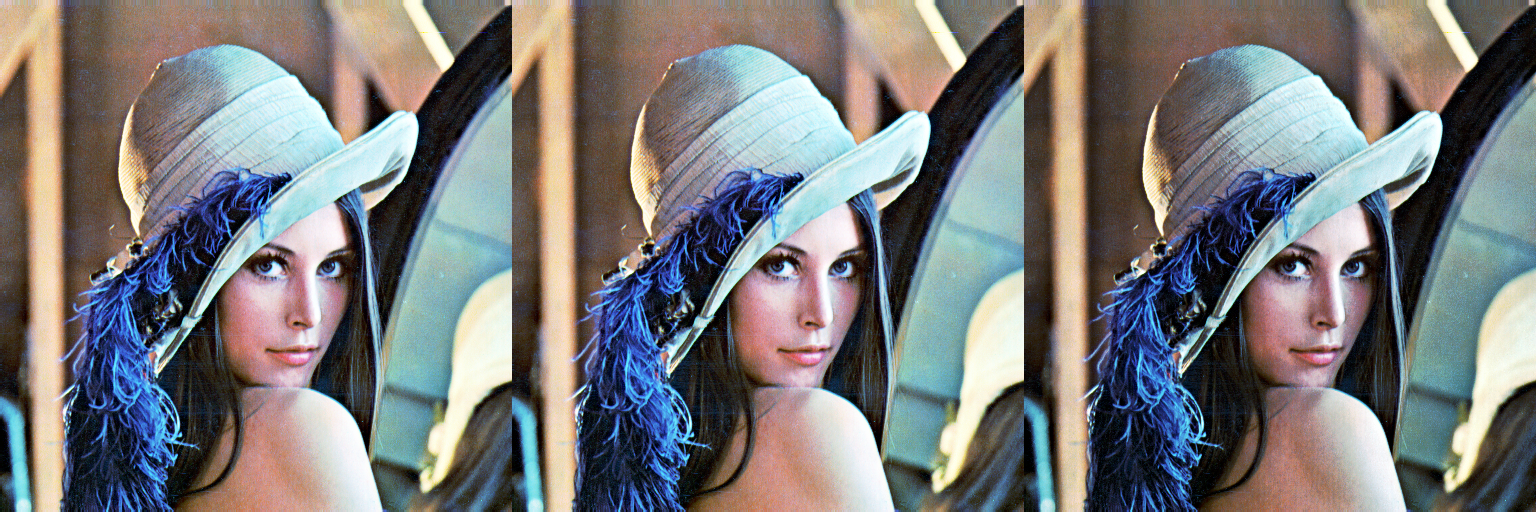

In [78]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

equalHist_by_channel = img
equalHist_by_channel[:,:,0] = cv2.equalizeHist(equalHist_by_channel[:,:,0])
equalHist_by_channel[:,:,1] = cv2.equalizeHist(equalHist_by_channel[:,:,1])
equalHist_by_channel[:,:,2] = cv2.equalizeHist(equalHist_by_channel[:,:,2])

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hsv[..., 2] = cv2.equalizeHist(img_hsv[..., 2])
img_hsv_equal = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

img_equalHist_change = np.hstack((img, equalHist_by_channel, img_hsv_equal))
cv2_imshow(img_equalHist_change)

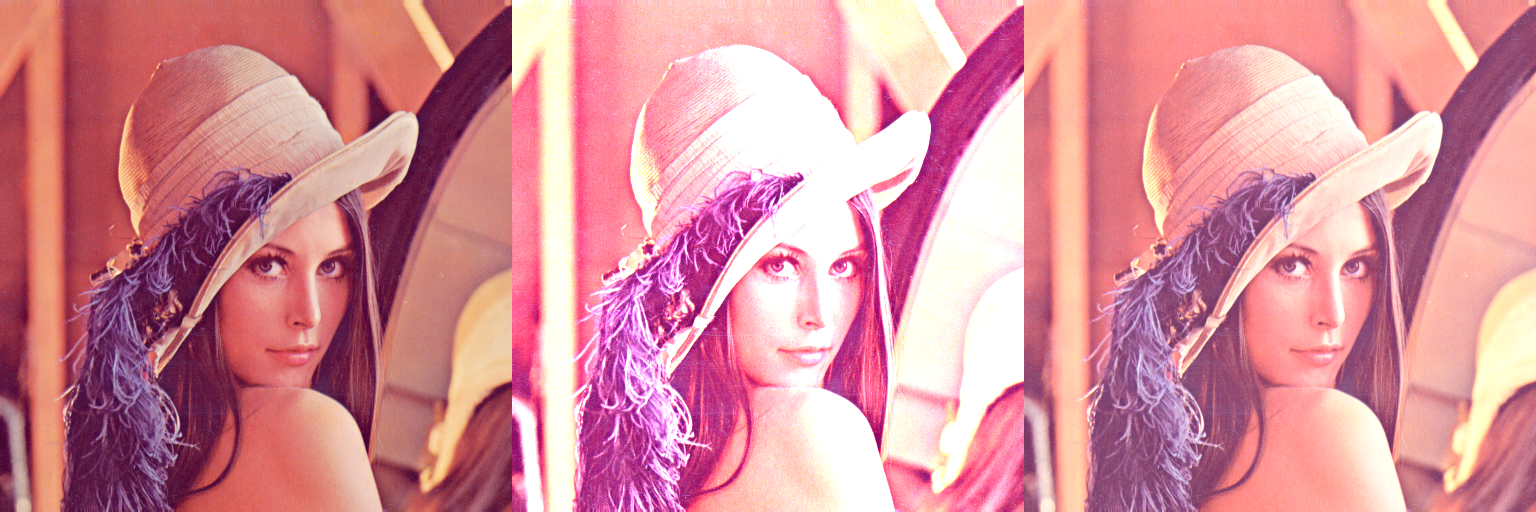

In [79]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=50)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))

cv2_imshow(img_contrast_light)